# Enter Student Name & ID

In [1]:
student_id = 400101204  #@param {type:"integer"}
student_name = "MohammadParsa Dini" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101204
your name: MohammadParsa Dini


In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [6]:
def myPCA(X, num_components):
    n, d = X.shape
    # Centering the data
    X_centered = X - np.mean(X, axis=0)
    # Calculating the covariance matrix
    covariance_matrix = np.dot(X_centered.T, X_centered) / n
    # Performing SVD
    U, Sigma, Vt = np.linalg.svd(covariance_matrix)
    # Sorting eigenvectors based on eigenvalues
    V = Vt.T
    eigenvectors = V[:, :num_components]
    # Projecting the data onto the principal components
    transformed_data = np.dot(X_centered, eigenvectors)
    # Returning the outputs
    return transformed_data, eigenvectors

# Getting the similarity between normalized x_test and vectors
def myPCA_pred(x_test, vectors):
    return np.dot(x_test - np.mean(x_test, axis=0), vectors)



### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

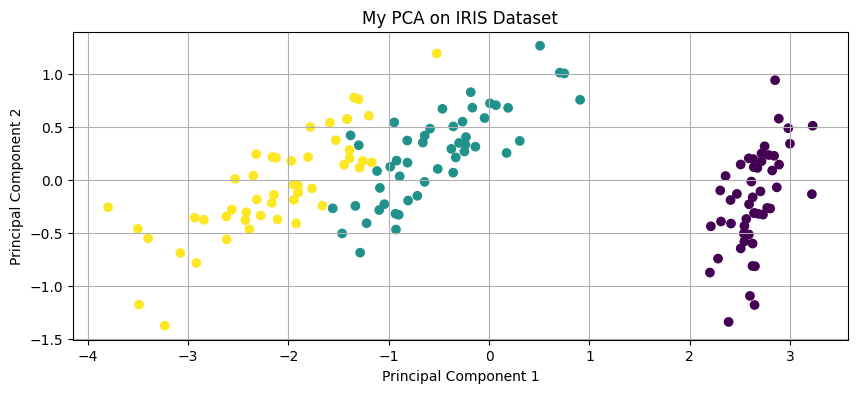

In [9]:
# myPCA on IRIS

# Load the IRIS dataset
iris = load_iris()
# Aplply PCA to the dataset
iris_pca, eigenvectors = myPCA(iris.data, 2)
# Plotting the results
plt.figure(figsize=(10, 4))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target)
plt.title('My PCA on IRIS Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

Eigenfaces are eigenvectors used in face recognition, representing the principal components of face images. Each face image is a high-dimensional vector (e.g., 100x100 pixels = 10,000 dimensions). The mean face is subtracted from each image to center the data, and the covariance matrix is computed. PCA is applied to find eigenvalues and eigenvectors of this matrix. The top eigenvectors (eigenfaces) reduce dimensionality. Each face is approximated by a combination of these eigenfaces. For recognition, a new face is projected onto the eigenface space, and the resulting coordinates are compared to known faces.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [16]:
import cv2
import numpy as np

# please dont change the directory
# if you wanted to run the code remember that i have imported the
# dataset in drive, so change it relatively!!

# Define the number of folders and images per folder
folder_number = 40
im_number = 10

# Function to read and preprocess an image
def get_image(i, j):
    # Read the image in grayscale mode and flatten it to a 1D array, then normalize pixel values to [0, 1]
    return cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/FacesDataset1/ORL/s{i+1}/{j+1}.bmp', cv2.IMREAD_GRAYSCALE).flatten() / 255.0

# Function to create the dataset
def get_dataset(shuffle=True, folder_number=folder_number, im_number=im_number):
    # Initialize lists to hold training and testing data and labels
    x_train, y_train, x_test, y_test = [], [], [], []

    # Loop through each folder
    for i in range(folder_number):
        # Loop through each image in the folder
        for j in range(im_number):
            # Get the preprocessed image
            image = get_image(i, j)
            # Split the data into training and testing sets
            if j < (im_number / 2):
                x_train.append(image)
                y_train.append(i + 1)  # Label for training data
            else:
                x_test.append(image)
                y_test.append(i + 1)  # Label for testing data

    # Shuffle the dataset if required
    if shuffle:
        # Convert lists to numpy arrays
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)
        # Shuffle training data
        shuffle_indices_tr = np.random.permutation(len(x_train))
        x_train = x_train[shuffle_indices_tr]
        y_train = y_train[shuffle_indices_tr]
        # Shuffle testing data
        shuffle_indices_test = np.random.permutation(len(x_test))
        x_test = x_test[shuffle_indices_test]
        y_test = y_test[shuffle_indices_test]

    # Return the training and testing datasets
    return x_train, y_train, x_test, y_test

# Generate the dataset
x_train, y_train, x_test, y_test = get_dataset()


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [13]:
from sklearn.decomposition import PCA


num_components = 50

# Perform PCA
x_train_pca, eigenvectors = myPCA(x_train, num_components)
x_test_pca = myPCA_pred(x_test, eigenvectors)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [19]:
# Training LDA classifier on PCA-transformed training data

def lda_train_test(x_train_pca, y_train, x_test_pca, y_test):
    lda = LDA()
    lda.fit(x_train_pca, y_train)
    tr_pred = lda.predict(x_train_pca)
    test_pred = lda.predict(x_test_pca)
    return accuracy_score(y_train, tr_pred), accuracy_score(y_test, test_pred)


# Train and test LDA classifier
train_acc, test_acc = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
print(f'Training Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Training Accuracy: 0.770
Test Accuracy: 0.025


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


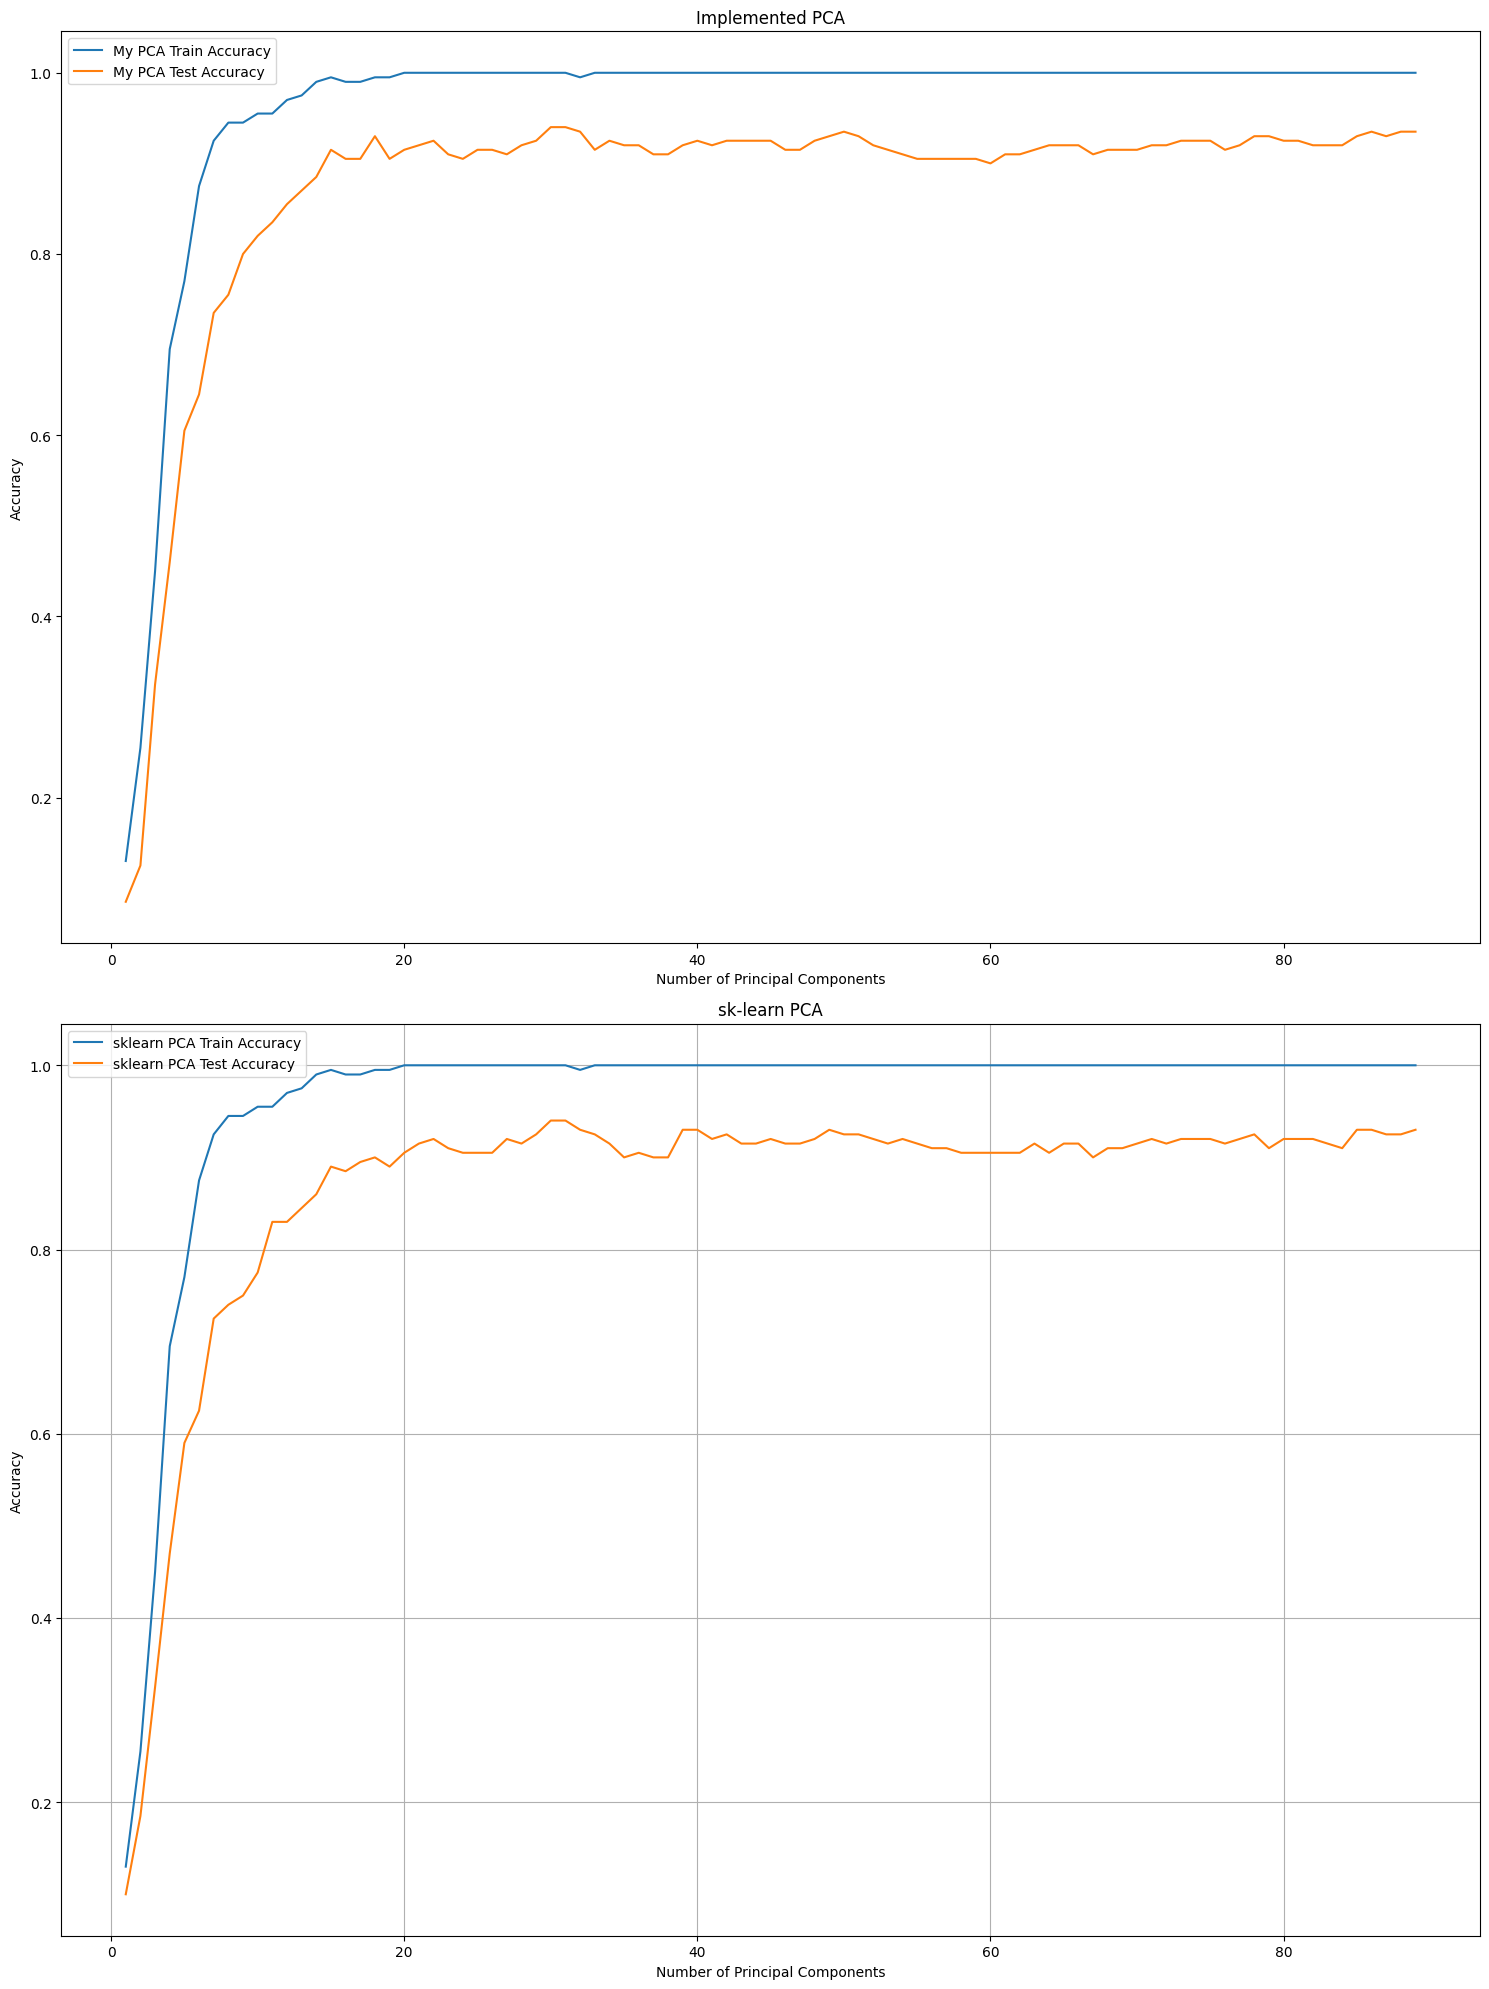

In [20]:
# CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to perform PCA and LDA, and compare implemented PCA with sklearn PCA
def perform_pca_lda(x_train, y_train, x_test, y_test, dims):

    # Dictionaries to store accuracies for implemented PCA and sklearn PCA
    train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk = {}, {}, {}, {}

    # Implemented PCA
    for i in dims:
        # Perform PCA using custom implementation
        x_train_pca, eigenvectors = myPCA(x_train, i)
        x_test_pca = myPCA_pred(x_test, eigenvectors)
        # Train and test LDA on the PCA-transformed data
        my_accuracy = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
        # Store the accuracies
        train_accuracy_implemented[i], test_accuracy_implemented[i] = my_accuracy

    # sklearn PCA
    for i in dims:
        # Perform PCA using sklearn
        pca = PCA(n_components=i)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        x_test_pca = pca.transform(x_test)
        # Train and test LDA on the PCA-transformed data
        sk_accuracy = lda_train_test(x_train_pca, y_train, x_test_pca, y_test)
        # Store the accuracies
        train_accuracy_sk[i], test_accuracy_sk[i] = sk_accuracy

    # Return the accuracy dictionaries
    return train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk

# Perform PCA and LDA for different dimensions
dims = range(1, 90)
train_accuracy_implemented, test_accuracy_implemented, train_accuracy_sk, test_accuracy_sk = perform_pca_lda(x_train, y_train, x_test, y_test, dims)

# Plotting results
plt.figure(figsize=(15, 20))

# Plot accuracies for implemented PCA
plt.subplot(2, 1, 1)
plt.plot(train_accuracy_implemented.keys(), train_accuracy_implemented.values(), label='My PCA Train Accuracy')
plt.plot(test_accuracy_implemented.keys(), test_accuracy_implemented.values(), label='My PCA Test Accuracy')
plt.title('Implemented PCA')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')

# Plot accuracies for sklearn PCA
plt.subplot(2, 1, 2)
plt.plot(train_accuracy_sk.keys(), train_accuracy_sk.values(), label='sklearn PCA Train Accuracy')
plt.plot(test_accuracy_sk.keys(), test_accuracy_sk.values(), label='sklearn PCA Test Accuracy')
plt.title('sklearn PCA')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


According to plots depicted above, we can deduce that more than $ 20$ Principal Components are sufficient for almost $100\%$ accuracy.